In [ ]:
import torch

print(torch.__version__)

# Example Figure Draw

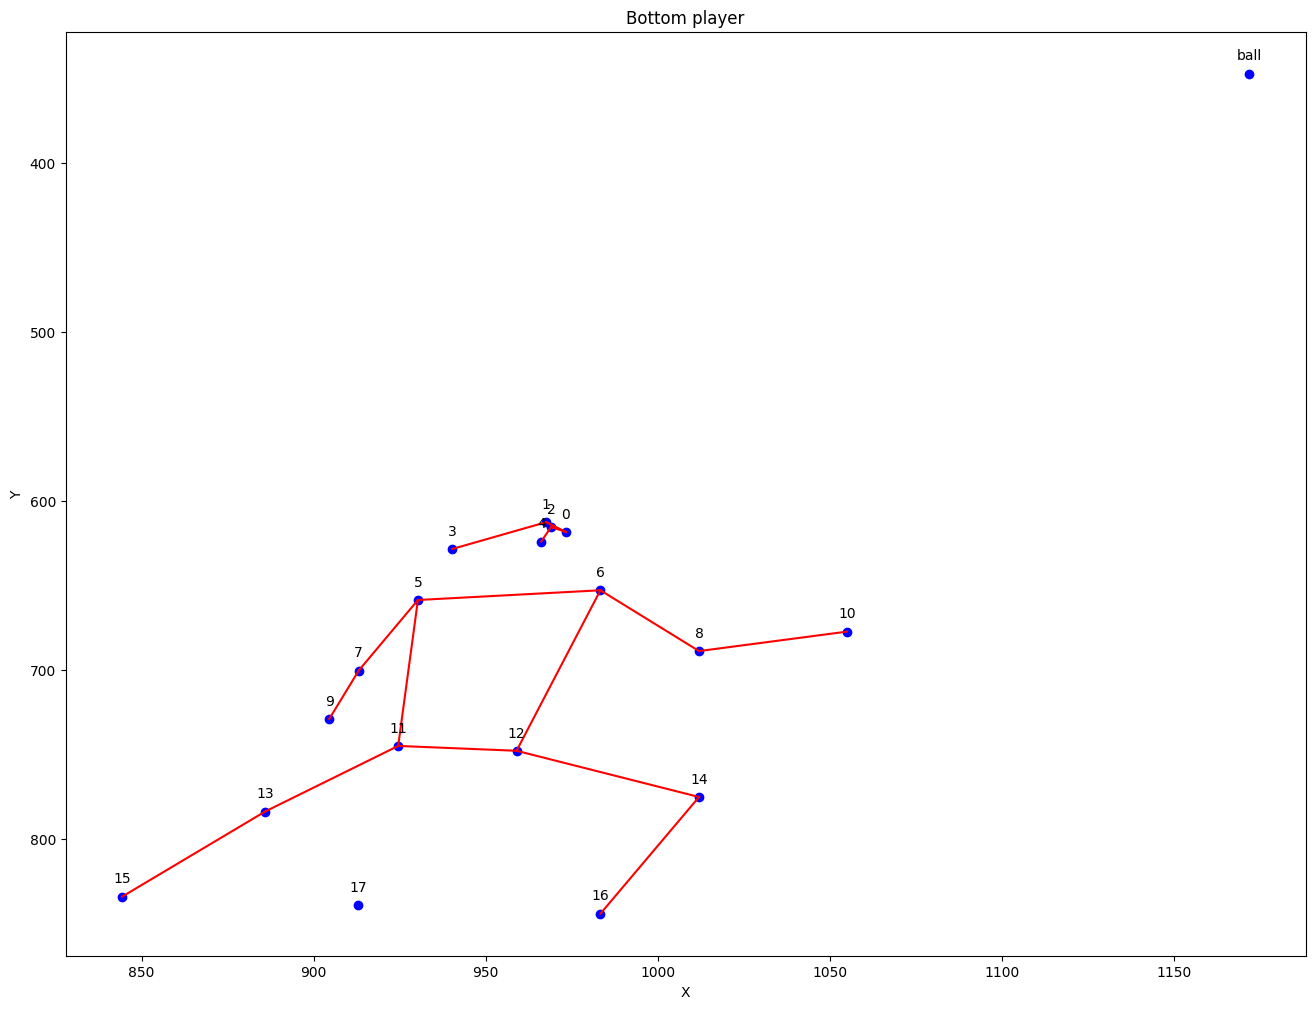

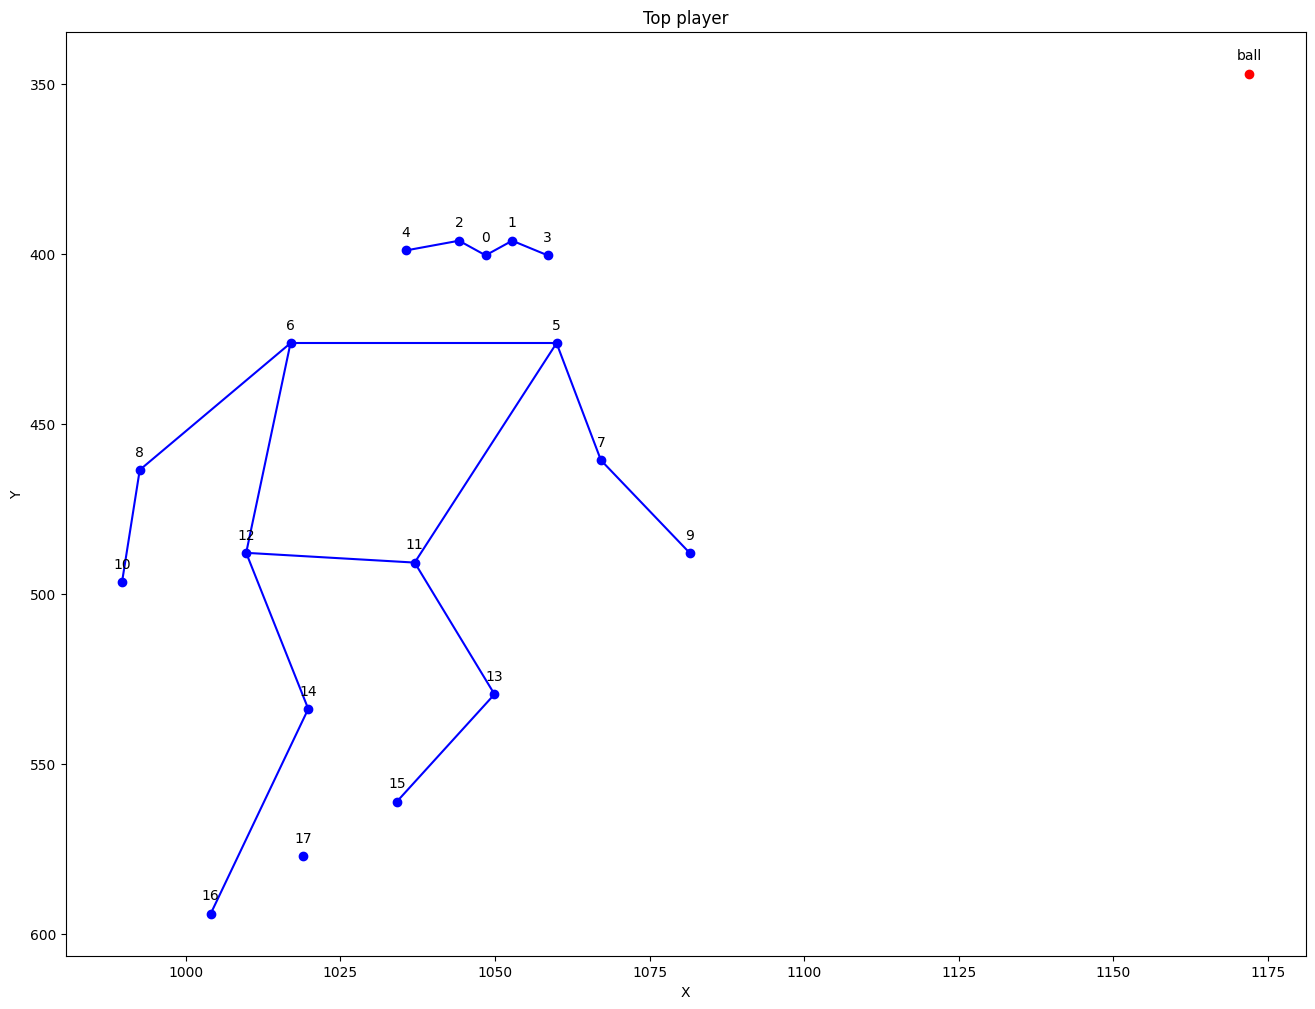

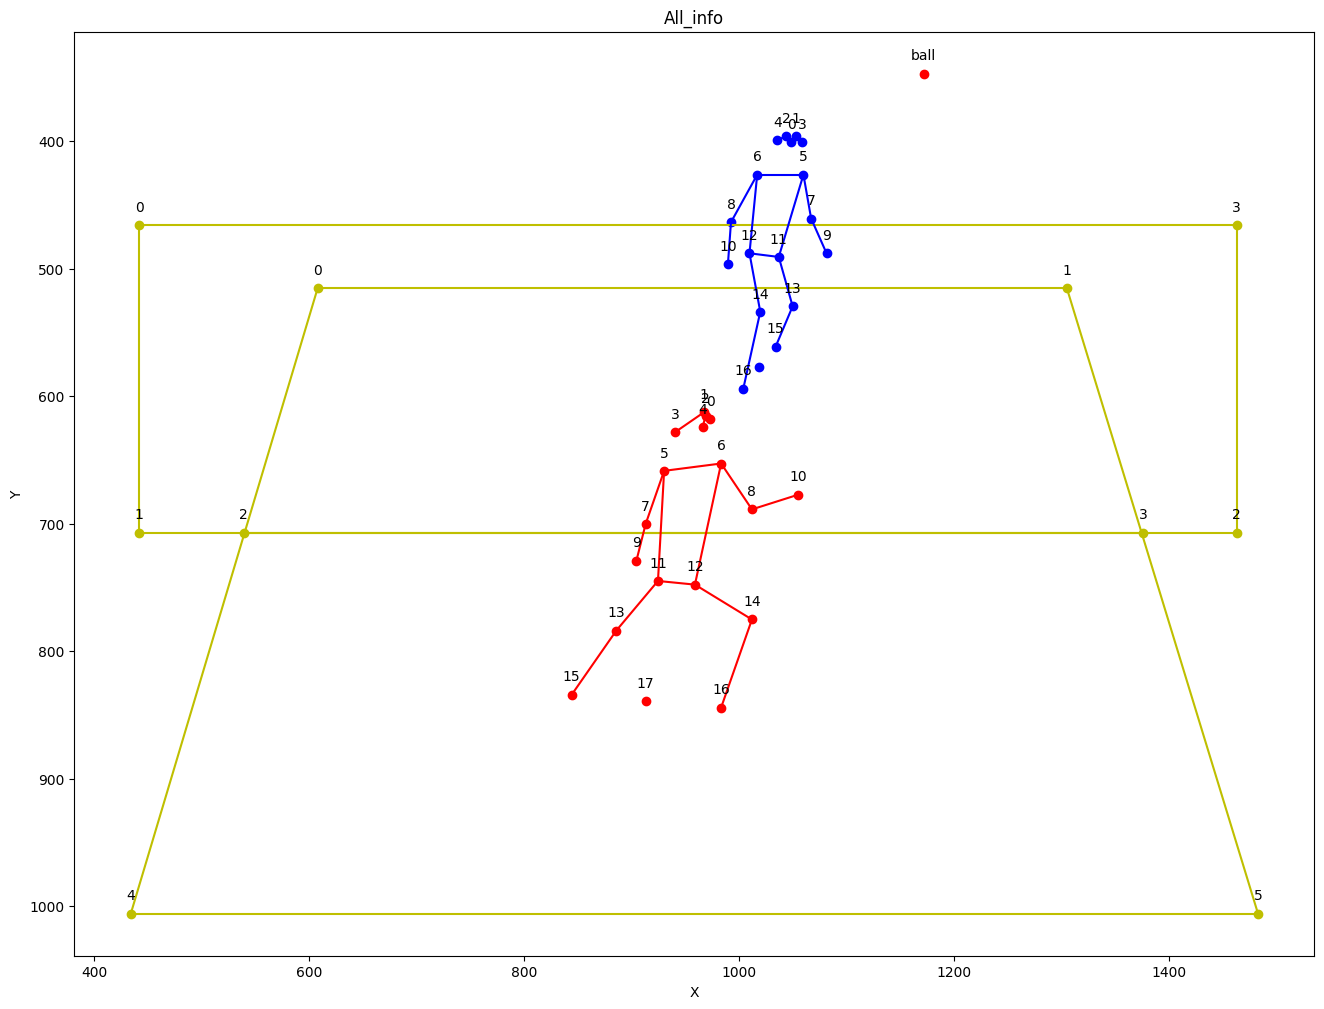

In [11]:
import cv2
import copy
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from torchvision.transforms import functional as F
import os
from src.tools.utils import write_json, read_json,clear_file, is_video_detect, find_next, find_reference
from src.tools.VideoClip import VideoClip
from src.models.PoseDetect import PoseDetect
from src.models.CourtDetect import CourtDetect
from src.models.NetDetect import NetDetect
import argparse
from src.tools.BallDetect import ball_detect
import warnings
# clear the polyfit Rankwarning
warnings.simplefilter('ignore', np.RankWarning)


players_dict = read_json("res/players/player_kp/test1.json")
ball_dict=read_json("res/ball/loca_info(denoise)/test1/test1_273-547.json")
court_dict=read_json("res/courts/court_kp/test1.json")


current_frame=296
ball=(ball_dict[str(current_frame)]['x'],ball_dict[str(current_frame)]['y'])

# figure 1
plt.figure(figsize=(16, 12)) 
plt.gca().invert_yaxis()

# 给定的点
joints = players_dict[f"{current_frame}"]
players_joints = joints['bottom']

# 提取 x 坐标和 y 坐标
x = [joint[0] for joint in players_joints]
y = [joint[1] for joint in players_joints]

x.append(int((x[15]+x[16])/2))
y.append(int((y[15]+y[16])/2))


# 创建散点图
plt.scatter(x, y,c="b")

plt.scatter(ball[0], ball[1],c="b")
plt.annotate("ball", (ball[0], ball[1]), textcoords="offset points", xytext=(0,10), ha='center')


edges = [(0, 1), (0, 2), (2, 4), (1, 3), (6, 8), (8, 10), (11, 12),
         (5, 7), (7, 9), (5, 11), (11, 13), (13, 15), (6, 12),
         (12, 14), (14, 16), (5, 6)]

# 循环添加标号
for i, joint in enumerate(x):
    plt.annotate(str(i), (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 绘制连接线
for edge in edges:
    plt.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], 'r-')


# 设置图形标题和轴标签
plt.title('Bottom player')
plt.xlabel('X')
plt.ylabel('Y')

# 显示图形
plt.savefig("docs/Bottom_player.png")


# figure 1
plt.figure(figsize=(16, 12)) 
plt.gca().invert_yaxis()

# 给定的点
joints = players_dict[f"{current_frame}"]
players_joints = joints['top']

# 提取 x 坐标和 y 坐标
x = [joint[0] for joint in players_joints]
y = [joint[1] for joint in players_joints]

x.append(int((x[15]+x[16])/2))
y.append(int((y[15]+y[16])/2))


# 创建散点图
plt.scatter(x, y,c="b")

plt.scatter(ball[0], ball[1],c="r")
plt.annotate("ball", (ball[0], ball[1]), textcoords="offset points", xytext=(0,10), ha='center')


edges = [(0, 1), (0, 2), (2, 4), (1, 3), (6, 8), (8, 10), (11, 12),
         (5, 7), (7, 9), (5, 11), (11, 13), (13, 15), (6, 12),
         (12, 14), (14, 16), (5, 6)]

# 循环添加标号
for i, joint in enumerate(x):
    plt.annotate(str(i), (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 绘制连接线
for edge in edges:
    plt.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], 'b-')


# 设置图形标题和轴标签
plt.title('Top player')
plt.xlabel('X')
plt.ylabel('Y')

# 显示图形
plt.savefig("docs/Top_player.png")


# figure 2
plt.figure(figsize=(16, 12)) 
plt.gca().invert_yaxis()


court=court_dict['court_info']
# 提取 x 坐标和 y 坐标
x = [joint[0] for joint in court]
y = [joint[1] for joint in court]


# 创建散点图
plt.scatter(x, y,c="y")

edges = [(0, 1), (2, 3), (4, 5),(0,4),(1,5)]

# 循环添加标号
for i, joint in enumerate(court):
    plt.annotate(str(i), (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 绘制连接线
for edge in edges:
    plt.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], 'y-')


net=court_dict['net_info']


# 提取 x 坐标和 y 坐标
x = [joint[0] for joint in net]
y = [joint[1] for joint in net]



# 创建散点图
plt.scatter(x, y,c="y")

edges = [(0, 1), (1, 2), (2, 3),(0,3)]

# 循环添加标号
for i, joint in enumerate(net):
    plt.annotate(str(i), (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 绘制连接线
for edge in edges:
    plt.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], 'y-')



# 给定的点
joints = players_dict[f"{current_frame}"]
players_joints = joints['top']

# 提取 x 坐标和 y 坐标
x = [joint[0] for joint in players_joints]
y = [joint[1] for joint in players_joints]


x.append(int((x[15]+x[16])/2))
y.append(int((y[15]+y[16])/2))


# 创建散点图
plt.scatter(x, y,c="b")

plt.scatter(ball[0], ball[1],c="r")
plt.annotate("ball", (ball[0], ball[1]), textcoords="offset points", xytext=(0,10), ha='center')


edges = [(0, 1), (0, 2), (2, 4), (1, 3), (6, 8), (8, 10), (11, 12),
         (5, 7), (7, 9), (5, 11), (11, 13), (13, 15), (6, 12),
         (12, 14), (14, 16), (5, 6)]

# 循环添加标号
for i, joint in enumerate(players_joints):
    plt.annotate(str(i), (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 绘制连接线
for edge in edges:
    plt.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], 'b-')

players_joints = joints['bottom']

# 提取 x 坐标和 y 坐标
x = [joint[0] for joint in players_joints]
y = [joint[1] for joint in players_joints]

x.append(int((x[15]+x[16])/2))
y.append(int((y[15]+y[16])/2))


# 创建散点图
plt.scatter(x, y,c="r")

edges = [(0, 1), (0, 2), (2, 4), (1, 3), (6, 8), (8, 10), (11, 12),
         (5, 7), (7, 9), (5, 11), (11, 13), (13, 15), (6, 12),
         (12, 14), (14, 16), (5, 6)]

# 循环添加标号
for i, joint in enumerate(x):
    plt.annotate(str(i), (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 绘制连接线
for edge in edges:
    plt.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], 'r-')


# 设置图形标题和轴标签
plt.title('All_info')
plt.xlabel('X')
plt.ylabel('Y')

# 显示图形
plt.savefig("docs/All_info.png")



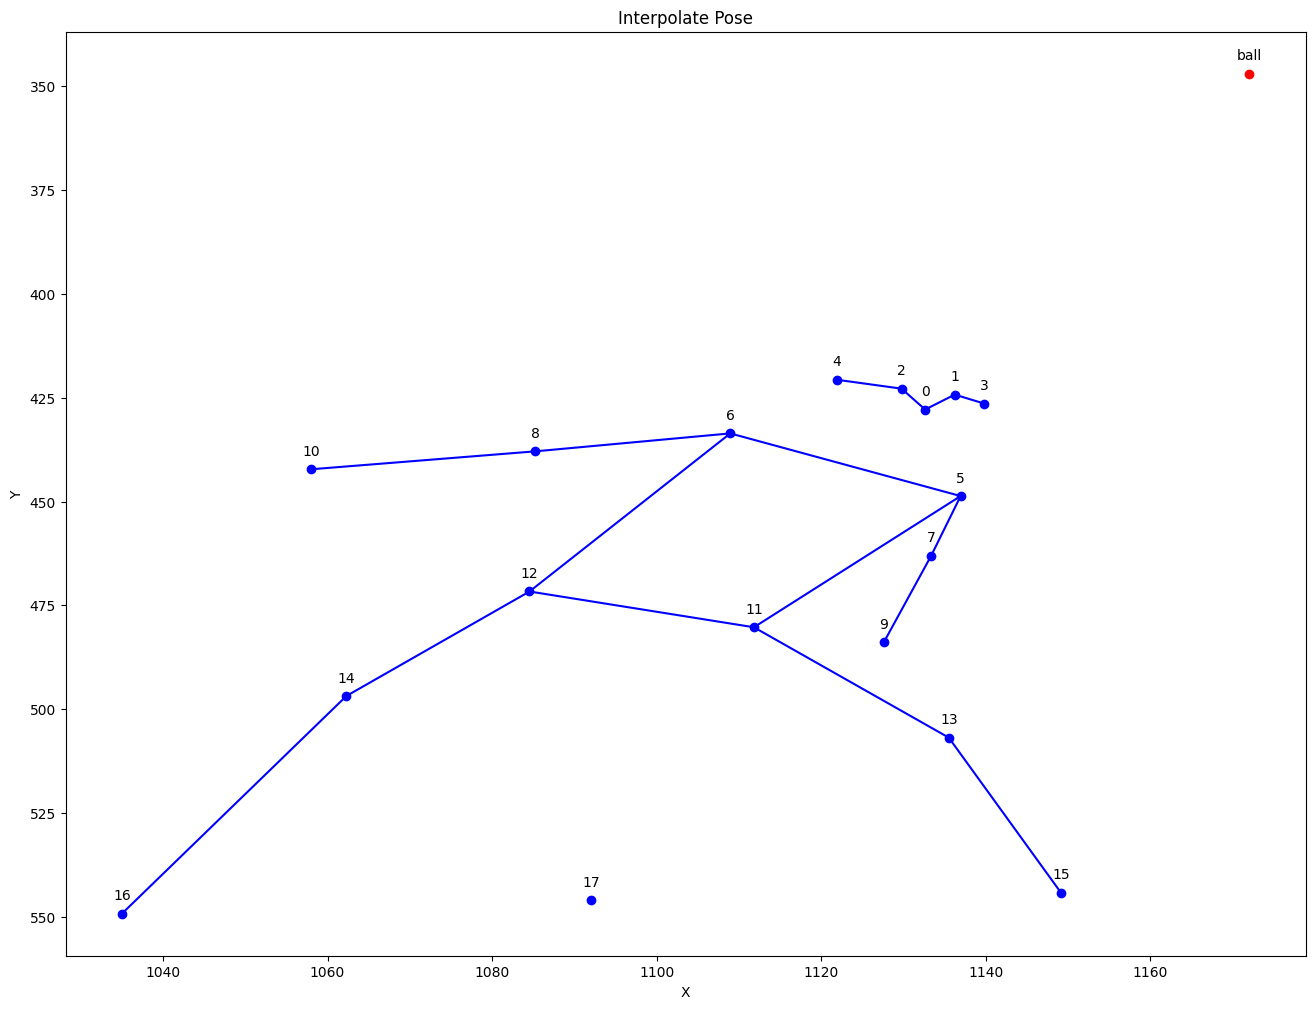

In [12]:
#Akane_YAMAGUCHI_AN_Se_Young_BWF_World_Championships_2022_Semi_finals
# frame_num=50786 
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from torchvision.transforms import functional as F
import os
from src.tools.utils import write_json, read_json,clear_file, is_video_detect, find_next, find_reference
from src.tools.VideoClip import VideoClip
from src.models.PoseDetect import PoseDetect
from src.models.CourtDetect import CourtDetect
from src.models.NetDetect import NetDetect
import argparse
from src.tools.BallDetect import ball_detect
import warnings
# clear the polyfit Rankwarning
warnings.simplefilter('ignore', np.RankWarning)



# figure 1
plt.figure(figsize=(16, 12)) 
plt.gca().invert_yaxis()

# 给定的点
joints = players_dict[f"{current_frame}"]
players_joints =[[1132.6281127929688, 427.8516082763672], [1136.2178344726562, 424.2587890625], [1129.7571411132812, 422.8225860595703], [1139.8053588867188, 426.41078186035156], [1121.86328125, 420.6706085205078], [1136.9344482421875, 448.6787414550781], [1108.9441528320312, 433.59637451171875], [1133.3582153320312, 463.0407257080078], [1085.2670288085938, 437.90960693359375], [1127.6141967773438, 483.8493194580078], [1057.984375, 442.2367248535156], [1111.8173828125, 480.2704162597656], [1084.5414428710938, 471.6578826904297], [1135.4989624023438, 506.8423767089844], [1062.29296875, 496.8168029785156], [1149.1323852539062, 544.1834716796875], [1035.01025390625, 549.2356567382812]]


# 提取 x 坐标和 y 坐标
x = [joint[0] for joint in players_joints]
y = [joint[1] for joint in players_joints]

x.append(int((x[15]+x[16])/2))
y.append(int((y[15]+y[16])/2))


# 创建散点图
plt.scatter(x, y,c="b")

plt.scatter(ball[0], ball[1],c="r")
plt.annotate("ball", (ball[0], ball[1]), textcoords="offset points", xytext=(0,10), ha='center')


edges = [(0, 1), (0, 2), (2, 4), (1, 3), (6, 8), (8, 10), (11, 12),
         (5, 7), (7, 9), (5, 11), (11, 13), (13, 15), (6, 12),
         (12, 14), (14, 16), (5, 6)]

# 循环添加标号
for i, joint in enumerate(x):
    plt.annotate(str(i), (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 绘制连接线
for edge in edges:
    plt.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], 'b-')


# 设置图形标题和轴标签
plt.title('Interpolate Pose')
plt.xlabel('X')
plt.ylabel('Y')

# 显示图形
plt.savefig("docs/imgs/Interpolate_Pose.png")
